本次分析主要探寻泰坦尼克号上的生还率和各因素（客舱等级、年龄、性别、上船港口等）的关系

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Read titanic_data.csv
titanic_df = pd.read_csv('titanic_data.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


可以观察到，PassengerId\Name\Ticket 等提供不了和生还有关的有效信息，在分析前可以先去掉。

In [3]:
# Test data information
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
# 删掉用处不大的数据
titanic_df = titanic_df.drop(['PassengerId','Name','Ticket'], axis = 1)

In [5]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [6]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 62.7+ KB


由此可见，Age/Cabin/Embarked 等字段有丢失值，在稍后的分析中应该先处理丢失值问题。

# 基本情况

In [7]:
#891人当中，共多少人生还？
total_survived_num = titanic_df['Survived'].sum()
total_no_survived_num = 891 - total_survived_num
print "生还者 %d 人，%d 人未生还。" % (total_survived_num,total_no_survived_num)

生还者 342 人，549 人未生还。


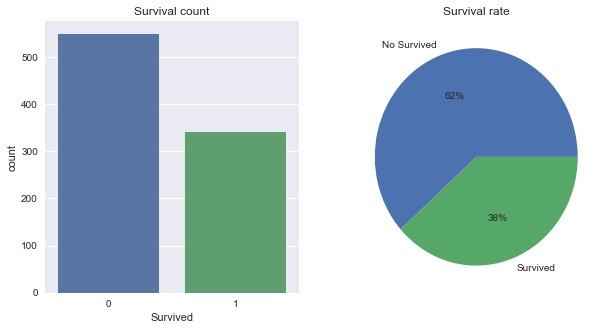

In [8]:
plt.figure(figsize = (10,5))
plt.subplot(121)
sns.countplot(x='Survived', data=titanic_df)
plt.title('Survival count')
    
plt.subplot(122)
plt.pie([total_no_survived_num, total_survived_num],labels=['No Survived','Survived'],autopct='%1.0f%%')
plt.title('Survival rate') 

plt.show()

这891名乘客中，生还和未生还的比例分别为 38% 和 62%。

下面，分别分析 Pclass、Sex、Age、SibSp、Parch、Fare、Cabin 和 Embarked 等与“生还”的关系

# Pclass

## 不同级别客舱的人数和比例

In [9]:
titanic_df[['Pclass','Survived']].groupby(['Pclass']).count()

,Survived
Pclass,
1,216
2,184
3,491


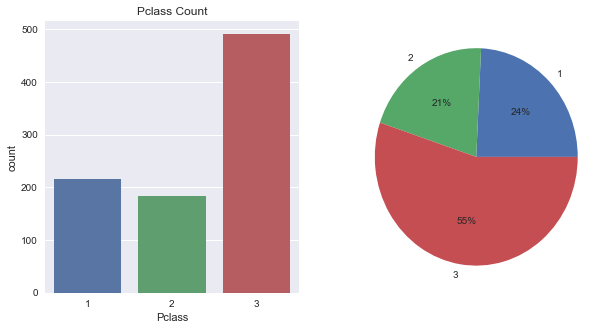

In [10]:
plt.figure(figsize= (10 ,5))
plt.subplot(121)
sns.countplot(x='Pclass', data=titanic_df)
plt.title('Pclass Count') 

plt.subplot(122)
plt.pie(titanic_df[['Pclass','Survived']].groupby(['Pclass']).count(),\
        labels=['1','2','3'],autopct='%1.0f%%')

plt.show()

海难发生前，一等舱、二等舱、三等舱的乘客分别为216、184、491人，分别占总人数的 24%， 21%， 55%。

## 不同级别客舱生还人数和占总生还人数的比例

In [11]:
survived_df = titanic_df[titanic_df[ 'Survived'] == 1 ]
survived_df[['Pclass','Survived']].groupby(['Pclass']).sum()

,Survived
Pclass,
1,136
2,87
3,119


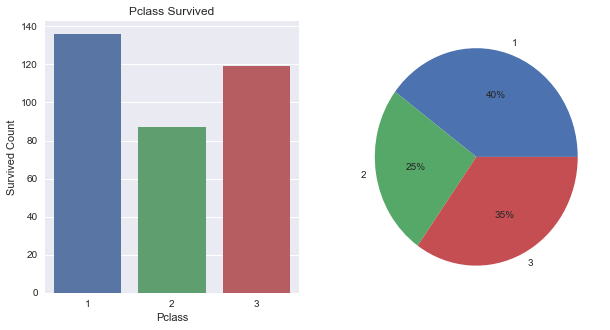

In [12]:
plt.figure(figsize= (10, 5))
plt.subplot(121)
sns.countplot(x='Pclass', data=survived_df)
plt.title('Pclass Survived') 
plt.ylabel('Survived Count')

plt.subplot(122)
plt.pie(survived_df[['Pclass','Survived']].groupby(['Pclass']).sum(),\
        labels=['1','2','3'],autopct='%1.0f%%')
plt.show()

海难发生后，一等舱、二等舱、三等舱的乘客人数变为136、87、119人，分别占总人数的 40%, 25%, 35%。

## 不同客舱分别的生还和未生还人数及生还率

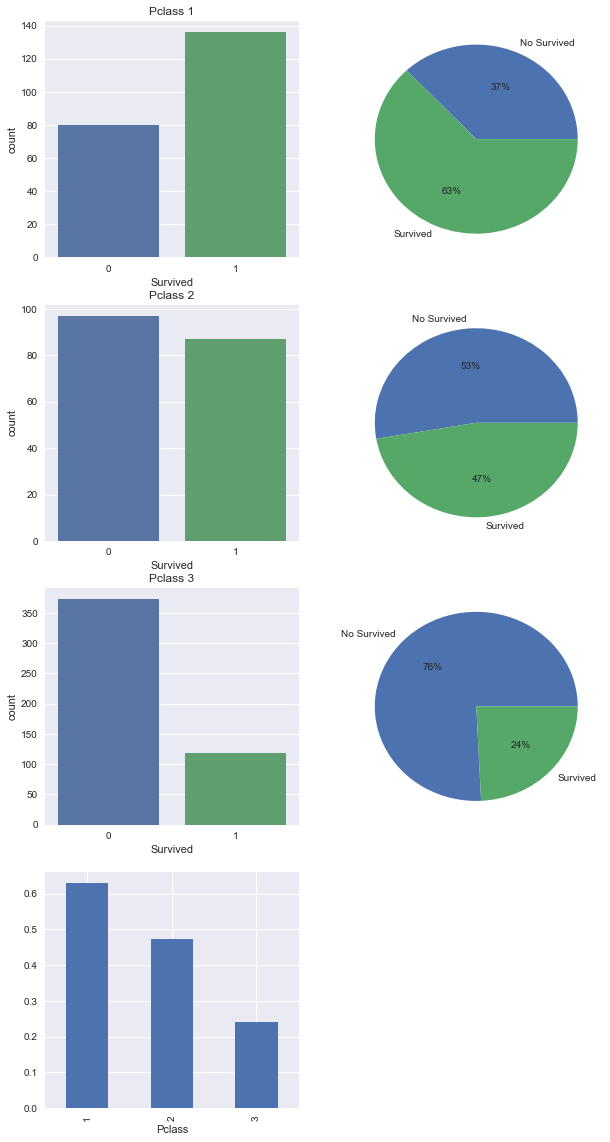

In [13]:
pclass1 = titanic_df[titanic_df['Pclass'] == 1]
pclass2 = titanic_df[titanic_df['Pclass'] == 2]
pclass3 = titanic_df[titanic_df['Pclass'] == 3]

plt.figure(figsize=(10,20))
plt.subplot(421)
sns.countplot(x = 'Survived', data = pclass1)
plt.title('Pclass 1') 

plt.subplot(422)
plt.pie([pclass1['Survived'][pclass1['Survived'] == 0].count(),pclass1['Survived'][pclass1['Survived'] == 1].count()],\
labels=['No Survived', 'Survived'],autopct='%1.0f%%')

plt.subplot(423)
sns.countplot(x = 'Survived', data = pclass2)
plt.title('Pclass 2') 

plt.subplot(424)
plt.pie([pclass2['Survived'][pclass2['Survived'] == 0].count(),pclass2['Survived'][pclass2['Survived'] == 1].count()],\
labels=['No Survived', 'Survived'],autopct='%1.0f%%')


plt.subplot(425)
sns.countplot(x = 'Survived', data = pclass3)
plt.title('Pclass 3') 

plt.subplot(426)
plt.pie([pclass3['Survived'][pclass3['Survived'] == 0].count(),pclass3['Survived'][pclass3['Survived'] == 1].count()],\
labels=['No Survived', 'Survived'],autopct='%1.0f%%')

plt.subplot(427)
survived_by_pclass = titanic_df.groupby('Pclass')['Survived'].mean()
survived_by_pclass.plot(kind = 'bar')

plt.show()

一等舱生还率为 63%，二等舱为 47%，三等舱为 24%。可见客舱等级越高，生还率越高。

# Sex

## 船上男女人数及比例？

In [14]:
male_sum = titanic_df['Sex'][titanic_df['Sex'] == 'male'].count()
female_sum = titanic_df['Sex'][titanic_df['Sex'] == 'female'].count()
print male_sum,female_sum

577 314


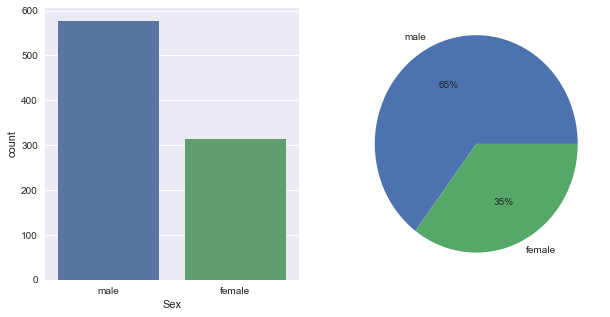

In [15]:
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.countplot(x='Sex', data=titanic_df)
plt.subplot(122)
plt.pie([male_sum,female_sum],\
        labels=['male', 'female'],autopct='%1.0f%%')
plt.show()

海难发生前，891人中，男性共577人，女性314人，男女比例为 65% 和 35%。

## 存活的男女数量及男女比例？

In [16]:
survived_male_sum = survived_df['Sex'][survived_df['Sex'] == 'male'].count()
survived_female_sum = survived_df['Sex'][survived_df['Sex'] == 'female'].count()
print survived_male_sum, survived_female_sum

109 233


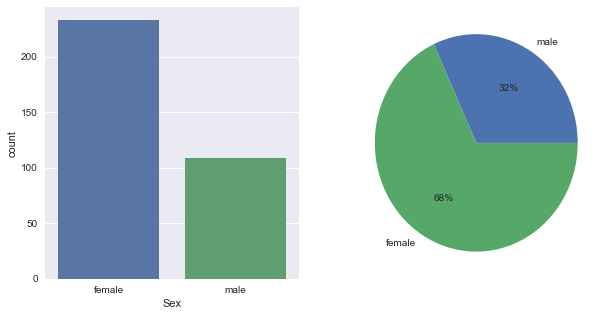

In [17]:
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.countplot(x='Sex', data=survived_df)
plt.subplot(122)
plt.pie([survived_male_sum, survived_female_sum],\
        labels=['male', 'female'],autopct='%1.0f%%')
plt.show()
# 如何改变countplot中的条形顺序？

海难发生后，男性变为109人，女性变为233人，男女比例变为 32% 和 68%。

## 男性的生还数量及生还率？

In [18]:
male_df = titanic_df[titanic_df['Sex'] == 'male']
male_df['Survived'][male_df['Survived'] == 1].count()

109

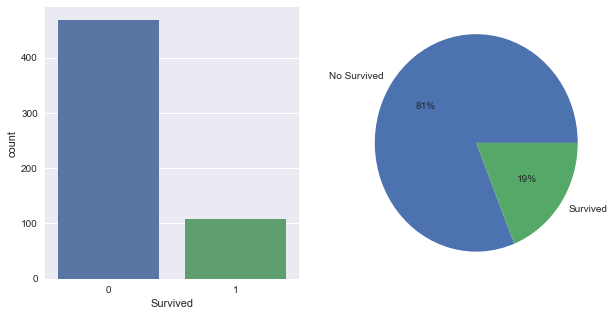

In [19]:

plt.figure(figsize=(10,5))
plt.subplot(121)
sns.countplot(x = 'Survived', data = male_df)
plt.subplot(122)
plt.pie([male_df['Survived'][male_df['Survived'] == 0].count(),male_df['Survived'][male_df['Survived'] == 1].count()],\
        labels=['No Survived', 'Survived'],autopct='%1.0f%%')
plt.show()

男性生还109人，生还率仅为 19%。

## 女性的生还数量及生还率？

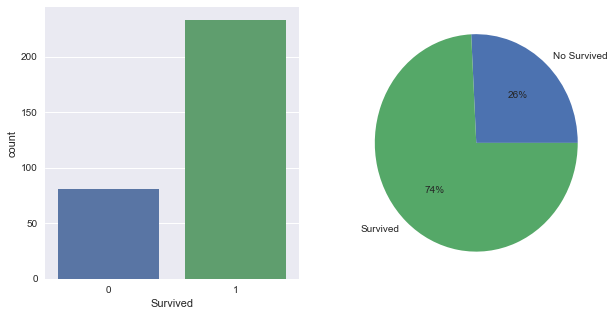

In [20]:
female_df = titanic_df[titanic_df['Sex'] == 'female']

plt.figure(figsize=(10,5))
plt.subplot(121)
sns.countplot(x = 'Survived', data = female_df)
plt.subplot(122)
plt.pie([female_df['Survived'][female_df['Survived'] == 0].count(),female_df['Survived'][female_df['Survived'] == 1].count()],\
        labels=['No Survived', 'Survived'],autopct='%1.0f%%')
plt.show()

女性生还 233 人，生还率为 74%。远远高于男性的 19%。

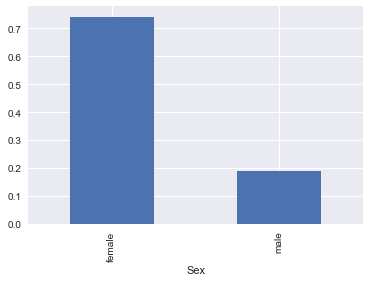

In [21]:
survived_by_pclass = titanic_df.groupby('Sex')['Survived'].mean()
survived_by_pclass.plot(kind = 'bar')
plt.show()

上图为女性生还率和男性生还率的对比图，女性 74% 的生还率远远高于男性的 19%。

# Age

由于 Age 有丢失值，先处理丢失值问题。 Age 的丢失值较多，填充的年龄为年龄平均值的上下一个标准差范围内的随机数。

In [22]:
# 求年龄的平均值，标准差以及丢失值的数量
average_age_titanic   = titanic_df["Age"].mean()
std_age_titanic       = titanic_df["Age"].std()
count_nan_age_titanic = titanic_df["Age"].isnull().sum()

# 求年龄随机数，范围在 (mean - std， mean + std)
rand_1 = np.random.randint(average_age_titanic - std_age_titanic, average_age_titanic + std_age_titanic, size = count_nan_age_titanic)

# 将随机数填充进 Age 的丢失值中
titanic_df["Age"][np.isnan(titanic_df["Age"])] = rand_1

C:\Users\Gaoke\Anaconda2\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


## 年龄分布？

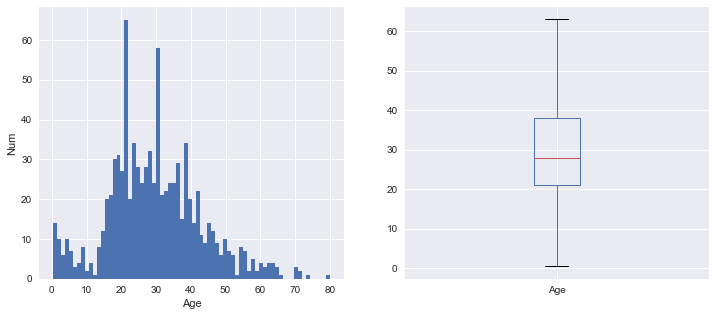

In [23]:
plt.figure(figsize=(12,5))
plt.subplot(121)
titanic_df['Age'].hist(bins = 70)
plt.xlabel('Age')
plt.ylabel('Num')

plt.subplot(122)
titanic_df.boxplot(column='Age', showfliers=False)

plt.show()

In [24]:
titanic_df['Age'].describe()

count    891.000000
mean      29.608496
std       13.538655
min        0.420000
25%       21.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

样本的 891 人中，平均年龄约为 30 岁， 标准差 15 岁，最小年龄为 0.42 ，最大年龄 80。

## 按照年龄，将乘客划分为儿童、少年、成年人和老年人，分析四个群体生还情况

In [25]:
children_df = titanic_df[ titanic_df['Age'] <= 12]
juvenile_df = titanic_df[(titanic_df['Age'] > 12) & (titanic_df['Age'] < 18)]
adults_df = titanic_df[(titanic_df['Age'] >= 18) & (titanic_df['Age'] < 65)]
agedness_df = titanic_df[titanic_df['Age'] >= 65]

In [26]:
# 各年龄段生还人数
children_survived_sum = children_df['Survived'].sum()
juvenile_survived_sum = juvenile_df['Survived'].sum()
adults_survived_sum = adults_df['Survived'].sum()
agedness_survived_sum = agedness_df['Survived'].sum()
print children_survived_sum, juvenile_survived_sum, adults_survived_sum , agedness_survived_sum

40 26 275 1


### 四个群体生还率对比

In [27]:
# 各年龄段生还率
children_survived_rate = children_df["Survived"].mean()
juvenile_survived_rate = juvenile_df['Survived'].mean()
adults_survived_rate = adults_df['Survived'].mean()
agedness_survived_rate = agedness_df['Survived'].mean()
print children_survived_rate, juvenile_survived_rate, adults_survived_rate, agedness_survived_rate

0.579710144928 0.426229508197 0.366666666667 0.0909090909091


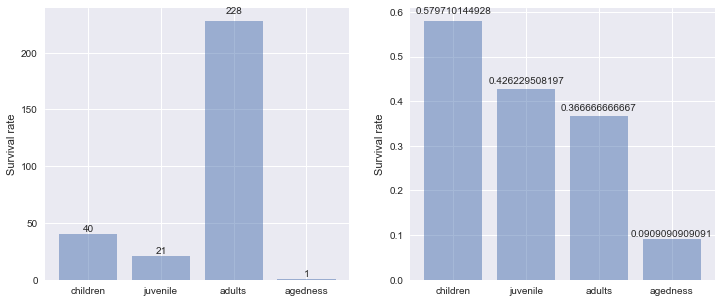

In [28]:
x = ['children', 'juvenile', 'adults', 'agedness']
b = [40, 21, 228, 1]
y = [children_survived_rate, juvenile_survived_rate , adults_survived_rate, agedness_survived_rate]
plt.figure(figsize=(12,5))
plt.subplot(121)
# 画条
x_pos = list(range(len(x)))
rects = plt.bar(x_pos, b, align='center', alpha=0.5)
 
# 标签
def autolabel(rects):
    for ii,rect in enumerate(rects):
        height = rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/2., 1.02*height, '%s'% (b[ii]),
            ha='center', va='bottom')
autolabel(rects)

# 设置标题
plt.ylabel('Survival rate')
plt.xticks(x_pos, x)

plt.subplot(122)
# 画条
x_pos = list(range(len(x)))
rects = plt.bar(x_pos, y, align='center', alpha=0.5)
 
# 标签
def autolabel(rects):
    for ii,rect in enumerate(rects):
        height = rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/2., 1.02*height, '%s'% (y[ii]),
            ha='center', va='bottom')
autolabel(rects)

# 设置标题
plt.ylabel('Survival rate')
plt.xticks(x_pos, x)

 
plt.show()

在样本中，生还的儿童、少年、成年和老年人数分别为40、 21、 228 和 1人，生还率分别为 58%， 48%， 39% 和 9%。

# SibSp

In [29]:
# 分为有兄弟姐妹和没有兄弟姐妹两组
sibsp_df = titanic_df[titanic_df['SibSp'] != 0]
no_sibsp_df = titanic_df[titanic_df['SibSp'] == 0]

In [30]:
sibsp_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
3,1,1,female,35.0,1,0,53.1000,C123,S
7,0,3,male,2.0,3,1,21.0750,NaN,S
9,1,2,female,14.0,1,0,30.0708,NaN,C


## 有兄弟姐妹的乘客的生还人数和生还率

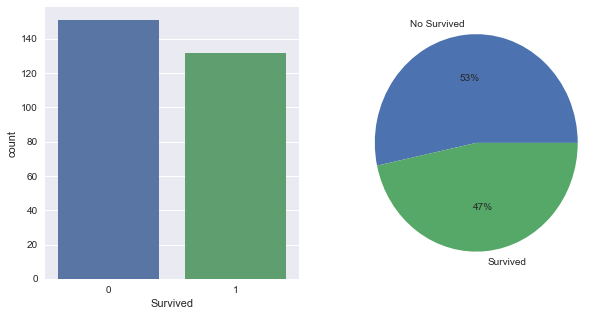

151 132


In [31]:
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.countplot(x = 'Survived', data = sibsp_df )

plt.subplot(122)
plt.pie([sibsp_df['Survived'][sibsp_df['Survived'] == 0].count(),sibsp_df['Survived'].sum()],\
        labels=['No Survived', 'Survived'],autopct='%1.0f%%')
plt.show()
print sibsp_df['Survived'][sibsp_df['Survived'] == 0].count(), sibsp_df['Survived'].sum()

有兄弟姐妹的乘客，生还 132 人，生还率为 47%。

## 没有兄弟姐妹的乘客的生还人数和生还率

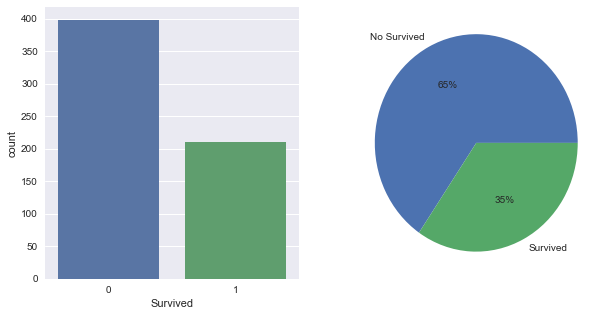

210


In [32]:
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.countplot(x = 'Survived', data = no_sibsp_df )

plt.subplot(122)
plt.pie([no_sibsp_df['Survived'][no_sibsp_df['Survived'] == 0].count(),no_sibsp_df['Survived'].sum()],\
        labels=['No Survived', 'Survived'],autopct='%1.0f%%')
plt.show()
print no_sibsp_df['Survived'].sum()

没有兄弟姐妹的乘客，共生还 210 人，生还率为 35%。

# Parch

In [33]:
# 分为有父母子女和没有父母子女两组
parch_df = titanic_df[titanic_df['Parch'] != 0]
no_parch_df = titanic_df[titanic_df['Parch'] == 0]

## 有父母子女的乘客的生还人数和生还率

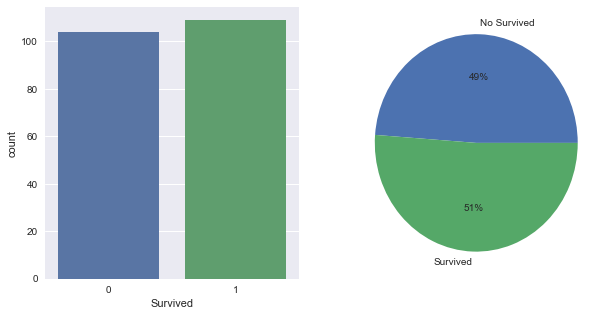

109


In [34]:
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.countplot(x = 'Survived', data = parch_df )

plt.subplot(122)
plt.pie([parch_df['Survived'][parch_df['Survived'] == 0].count(),parch_df['Survived'].sum()],\
        labels=['No Survived', 'Survived'],autopct='%1.0f%%')
plt.show()
print parch_df['Survived'].sum()

有父母或子女同船的乘客，生还 109 人，生还率为 51%。

## 没有父母子女的乘客的生还人数和生还率

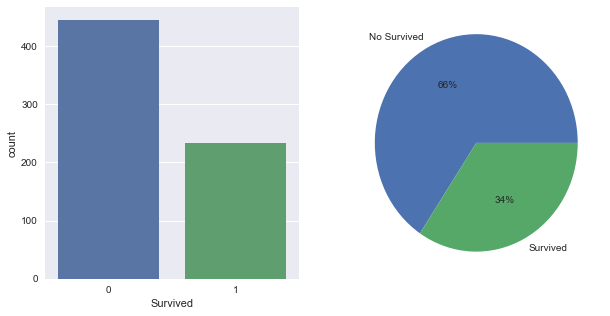

233


In [35]:
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.countplot(x = 'Survived', data = no_parch_df)

plt.subplot(122)
plt.pie([no_parch_df['Survived'][no_parch_df['Survived'] == 0].count(),no_parch_df['Survived'].sum()],\
        labels=['No Survived', 'Survived'],autopct='%1.0f%%')
plt.show()
print no_parch_df['Survived'].sum()

没有父母子女同船的乘客，生还 233 人，生还率仅为 34%。

# Fare

## 票价分布

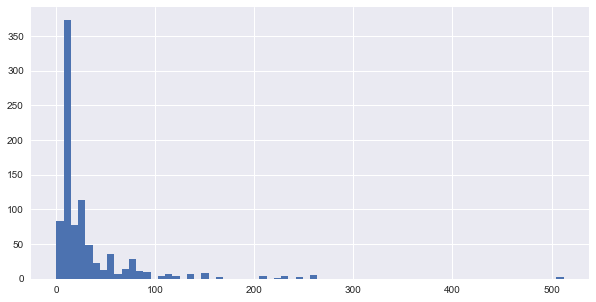

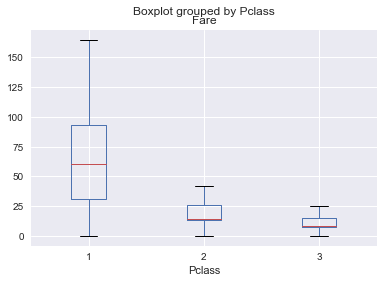

In [36]:
plt.figure(figsize=(10,5))
titanic_df['Fare'].hist(bins = 70)

titanic_df.boxplot(column='Fare', by='Pclass', showfliers=False)
plt.show()

In [37]:
titanic_df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

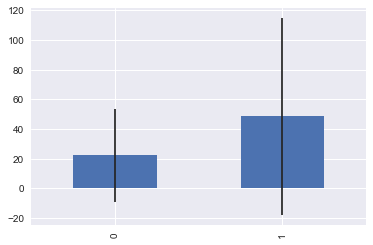

In [38]:
fare_not_survived = titanic_df["Fare"][titanic_df["Survived"] == 0]
fare_survived     = titanic_df["Fare"][titanic_df["Survived"] == 1]

avgerage_fare = pd.DataFrame([fare_not_survived.mean(), fare_survived.mean()])
std_fare      = pd.DataFrame([fare_not_survived.std(), fare_survived.std()])
avgerage_fare.plot(yerr=std_fare,kind='bar',legend=False)

plt.show()

可见，票价与生还有一定相关性，生还者的平均票价要比未生还的高。

# Cabin

丢失值太多，不能用此数据分析出 Cabin 不同对生存率的影响，丢掉。

In [39]:
titanic_df.drop("Cabin",axis=1,inplace=True)

# Embarked

Embarked 有两个丢失值，计划用众数填充

In [40]:
titanic_df["Embarked"] = titanic_df["Embarked"].fillna("S") 

不同港口上船的乘客是否与生还率有关系？

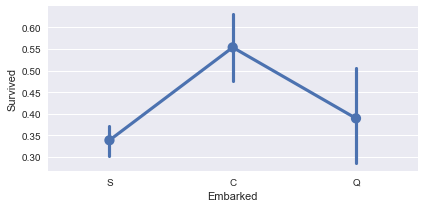

In [41]:
sns.factorplot('Embarked','Survived', data=titanic_df,size=3,aspect=2)
plt.show()

从 C 上船的生还率最高， Q 次之， S 最低。

## 各港口上船人数、生还人数及生还率

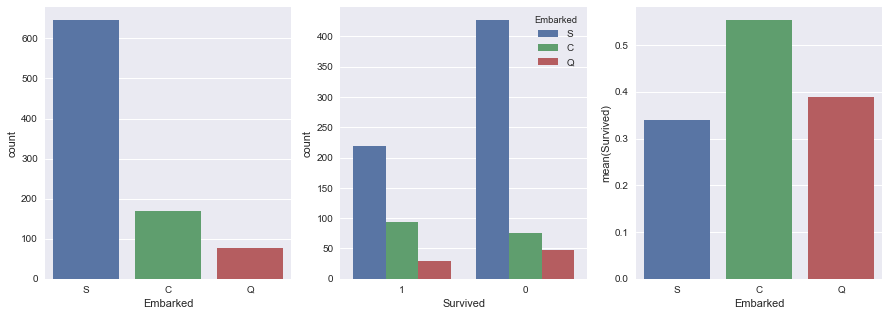

In [42]:
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5)) 

sns.countplot(x='Embarked', data=titanic_df, ax=axis1)
sns.countplot(x='Survived', hue="Embarked", data=titanic_df, order=[1,0], ax=axis2)

embark_perc = titanic_df[["Embarked", "Survived"]].groupby(['Embarked'],as_index=False).mean()
sns.barplot(x='Embarked', y='Survived', data=embark_perc,order=['S','C','Q'],ax=axis3)

plt.show()

S 港口生还人数最多，C 次之， Q 最少。从生还率来看， C 港上船的生还率最高， Q 次之， S 生还率最低。

# 分析总结

## 数据分析总结

本次分析主要探寻泰坦尼克号上的生还率和各因素（客舱等级、年龄、性别、上船港口等）的关系。

样本数量为 891，海难发生后，生还者还剩 342 人，生还率为 38%。

泰坦尼克号上有一\二\三等舱三种船舱类型。海难发生前，一等舱有 216 人，二等舱 184 人，三等舱 491 人，分别占总人数的 24%， 21%， 55%。海难发生后，一等舱、二等舱、三等舱的乘客人数变为136、87、119人，分别占总人数的 40%, 25%, 35%。一等舱生还率为 63%，二等舱为 47%，三等舱为 24%。可见客舱等级越高，生还率越高。

891 人中，891人中，男性共577人，女性314人，男女比例为 65% 和 35%。海难发生后，男性变为109人，女性变为233人，男女比例变为 32% 和 68%。男性生还109人，生还率仅为 19%。女性生还 233 人，生还率为 74%，远远高于男性的 19%。可见女性比男性在这次事故中更容易生还，表明“女士优先”的原则在本次事故中得到了发扬。

样本的 891 人中，平均年龄约为 30 岁， 标准差 15 岁，最小年龄为 0.42 ，最大年龄 80。按照儿童（0-12）、少年（12-18）、成人（18-65）、老年人（65及以上）划分为四类，四类人的生还率分别为58%， 48%， 39% 和 9%。可见年龄越大，生还率越低。“尊老爱幼”的原则在本次事故中没有很好体现。

有兄弟姐妹的乘客，生还 132 人，生还率为 47%，而没有兄弟姐妹的乘客，共生还 210 人，生还率为 35%。可见有兄弟姐妹同船的生还率比没有兄弟姐妹同船的生还率要高。

有父母或子女同船的乘客，生还 109 人，生还率为 51%。没有父母子女同船的乘客，生还 233 人，生还率仅为 34%。可见有父母或子女同船的生还率比没有的生还率要高。综合前一条分析，可以得出推论，有家人在船上的比没有家人在船上的生还概率要大。

票价与生还有一定相关性，生还者的平均票价要比未生还的高。

S 港口生还人数最多，C 次之， Q 最少。从生还率来看， C 港上船的生还率最高， Q 次之， S 生还率最低。


## 分析限制讨论

1. 此数据并非全部乘客的数据，据了解，泰坦尼克号上共有乘客 2224 人，而本数据集共有 891 人。如果该数据集是从 2224 人中随机选出，根据中心极限定理，该样本也足够大，分析结果有代表性；如果不是随机选出，那么分析结果就不可靠了。
2. 可能还有其他因素影响生还情况。比如乘客的国别是否与生还状况有关系？乘客的身高是否与生还状况有关系？乘客是否会游泳是否和生还情况有关系？